In [1]:
import numpy as np
from fourrooms_test import FourroomsTest
import gym
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
env = gym.make('Fourrooms-v1')
import pickle
import matplotlib as mpl
mpl.style.use('classic')

In [2]:

layout ="""\
wwwwwwwwwwwww
w     w     w
w   ffwff   w
w  fffffff  w
w   ffwff   w
w     w     w
ww wwww     w
w     www www
w     w     w
w     w     w
w           w
w     w     w
wwwwwwwwwwwww
"""

In [23]:
r_folder = "FR/Psi_0_05" #Path where data from experiment is stored example: "/FourRoomOption"

folder = r_folder
episode_finale = 20
weight_policy = np.load(os.path.join(r_folder, "Weights_Policy.npy"))[:,episode_finale]
weight_termination = np.load(os.path.join(r_folder, "Weights_Termination.npy"))[:,episode_finale]
weight_intra_option = np.load(os.path.join(r_folder, "Weights_IntraOption.npy"))[:,episode_finale]

In [76]:
def getEnvLayout(layout, frozen = True):
    num_elem = 13
    line_count = 0
    mat_layout = -2*np.ones((num_elem, num_elem))
    mapping_state_row_col = defaultdict(list)
    ann_layout = np.zeros((num_elem, num_elem))
        
    state_count = 0
    for line in layout.splitlines():
        for i in range(num_elem):
            if line[i]!="w":
                mapping_state_row_col[state_count].extend([line_count, i])
                ann_layout[line_count, i] = state_count
                state_count +=1            
            if line[i] == "f" and frozen == True:
                mat_layout[line_count, i] = 5
            elif line[i]=="w":
                    mat_layout[line_count, i] = 20
        line_count +=1

    return mat_layout, ann_layout, mapping_state_row_col

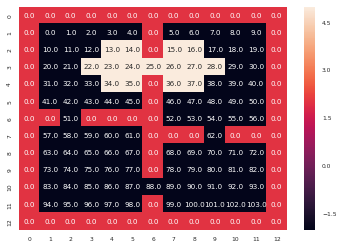

In [8]:
#graphical representation for the environment
plt.figsize=(10, 8)
mat_layout , ann_layout, mapping_state_row_col = getEnvLayout(layout)
sn.set(font_scale=0.6)
ax = sn.heatmap(mat_layout, annot = ann_layout, fmt = '')
plt.show()
plt.close()

In [66]:
init_state_done =[]
count_graph_plot = 0
run_to_show = 87 # run number of experiment

init state:  43


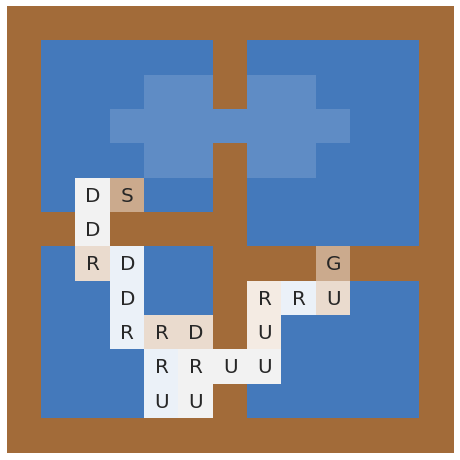

init state:  0


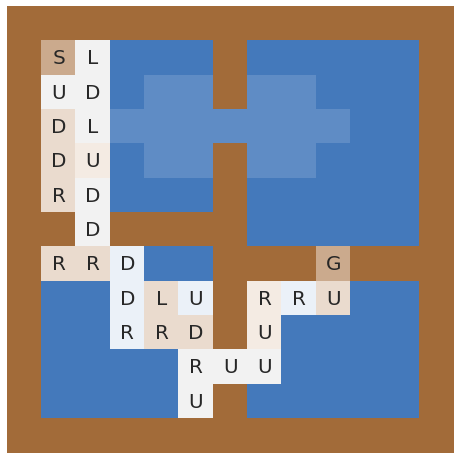

In [67]:
num_elem = 13
possible_goal_states = [62]
max_time_step = 90
action_mapping = [u'U',u'D', u'L', u'R']


start_states =[]
num_traj =3
count_traj = 1
while(count_traj<num_traj):
    
    curr_time = 0
    init_state = env.reset()
    if init_state in init_state_done:
        continue
    else:
        count_traj +=1
        ann_action = np.chararray((num_elem, num_elem))
        ann_action[:,:] = ''.encode("utf-8")
        init_state_done.append(init_state)

    print("init state: ", init_state)
    curr_state = init_state

    options_color = [40, 45,50, 55]
    cmap = sn.diverging_palette(250, 40, sep=20, as_cmap=True)


    goal_state = 62
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout)
    while(curr_state!= goal_state and max_time_step > curr_time): 
        option = np.argmax(weight_policy[run_to_show,curr_state,:])
        action = np.argmax(weight_intra_option[run_to_show,curr_state, :, option])
        next_state,r,d,_ = env.step(action)
        row, col = mapping_state_row_col[curr_state]
        mat_layout[row, col] = options_color[option]
        if curr_state == init_state:
            ann_action[row,col] = 'S'.encode("utf-8")
            mat_layout[row,col] = 70
        else:
            ann_action[row, col] = action_mapping[action].encode("utf-8")
        curr_state = next_state
        curr_time +=1

    if curr_state == possible_goal_states[0]:
        r,c = mapping_state_row_col[curr_state]
        mat_layout[r,c] = 70
        ann_action[r,c] = 'G'.encode("utf-8")
        
    plt.figure(figsize = (8,8))
    sn.set(font_scale=0.6)
    ax = sn.heatmap(mat_layout, annot = ann_action.decode(), fmt = '', cmap=cmap, cbar=False,annot_kws={"size": 20},square=True)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    init_state_done.append(init_state)
    count_graph_plot +=1
    plt.show()
    plt.close()

Option:  0


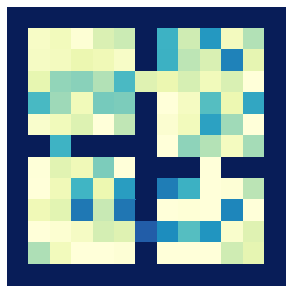

Option:  1


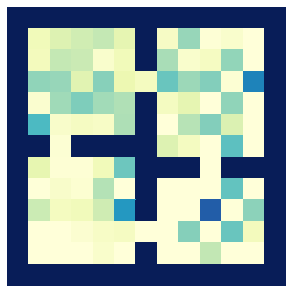

Option:  2


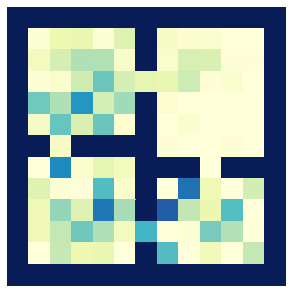

Option:  3


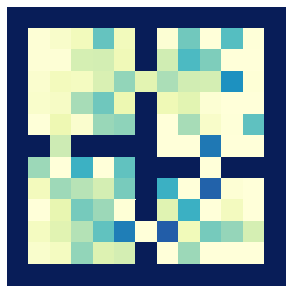

In [75]:
"""
Termination of options
"""

for option in range(4):
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout, frozen = False)
    wgt_term = weight_termination[2,:, option]
    print ("Option: ",option)
    wgt_term = (wgt_term-min(wgt_term))/(max(wgt_term)-min(wgt_term))
    fig, ax = plt.subplots(figsize=(6, 5))
    for curr_state in range(env.observation_space.n):
        r, c = mapping_state_row_col[curr_state]
        mat_layout[r,c] = wgt_term[curr_state]*15
        
    sn.set(font_scale=0.6)
    ax = sn.heatmap(mat_layout, fmt = '', cmap="YlGnBu", cbar = False, square=True)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()
    